In [1]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("break_vigenere_20221105_FirstTest.xlsx")

In [3]:
data = data.drop("Unnamed: 0", axis=1)

In [4]:
data["score"] = data["selection_max"]/data["target"]
data["progress"] = 1 - data["hamming_distance"]/data["key_size"]

In [5]:
data

,Unnamed: 0.1,generation,generation_count,seed,mutation_threshold,key_size,population_size,global_min,global_max,selection_min,...,best_individual,elapsed,hamming_distance,weights,target,original_key,text_length,path,score,progress
0,0,1,50,123456789,0.5,6,10,-2576.095225,-2280.620646,-2495.653214,...,PUOSEM,0.057949,5,"[0.6, 0.3, 0.1]",-1357.979929,SECRET,1174,..\media\break_vigenere_1.xlsx,1.679421,0.166667
1,1,2,50,123456789,0.5,6,10,-2506.191179,-2280.620646,-2446.151979,...,PUOSEM,0.061206,5,"[0.6, 0.3, 0.1]",-1357.979929,SECRET,1174,..\media\break_vigenere_1.xlsx,1.679421,0.166667
2,2,3,50,123456789,0.5,6,10,-2462.217341,-2280.620646,-2404.375268,...,PUOSEM,0.057754,5,"[0.6, 0.3, 0.1]",-1357.979929,SECRET,1174,..\media\break_vigenere_1.xlsx,1.679421,0.166667
3,3,4,50,123456789,0.5,6,10,-2527.355676,-2183.031944,-2374.401020,...,SAEZEU,0.057145,4,"[0.6, 0.3, 0.1]",-1357.979929,SECRET,1174,..\media\break_vigenere_1.xlsx,1.607558,0.333333
4,4,5,50,123456789,0.5,6,10,-2505.820515,-2096.441564,-2297.222370,...,SAEDEU,0.058003,4,"[0.6, 0.3, 0.1]",-1357.979929,SECRET,1174,..\media\break_vigenere_1.xlsx,1.543794,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102056,23,24,50,123456789,0.8,16,500,-1092.319258,-939.420815,-993.709937,...,GENETIBALTORITHM,2.924143,2,"[1, 0, 0]",-909.417194,GENETICALGORITHM,1174,..\media\break_vigenere_999.xlsx,1.032992,0.875000
102057,24,25,50,123456789,0.8,16,500,-1086.601056,-927.506694,-982.321371,...,GENETICALGLRITHM,2.835587,1,"[1, 0, 0]",-909.417194,GENETICALGORITHM,1174,..\media\break_vigenere_999.xlsx,1.019891,0.937500
102058,25,26,50,123456789,0.8,16,500,-1062.271157,-923.543124,-973.224843,...,GENETICALGXRITHM,2.885845,1,"[1, 0, 0]",-909.417194,GENETICALGORITHM,1174,..\media\break_vigenere_999.xlsx,1.015533,0.937500
102059,26,27,50,123456789,0.8,16,500,-1056.200932,-923.543124,-963.779020,...,GENETICALGXRITHM,2.858631,1,"[1, 0, 0]",-909.417194,GENETICALGORITHM,1174,..\media\break_vigenere_999.xlsx,1.015533,0.937500


In [6]:
data.dtypes

Unnamed: 0.1            int64
generation              int64
generation_count        int64
seed                    int64
mutation_threshold    float64
key_size                int64
population_size         int64
global_min            float64
global_max            float64
selection_min         float64
selection_max         float64
best_individual        object
elapsed               float64
hamming_distance        int64
weights                object
target                float64
original_key           object
text_length             int64
path                   object
score                 float64
progress              float64
dtype: object

In [29]:
progress = data.groupby("path").agg({
    "seed": "count",
    "weights": "last",
    "population_size": "last",
    "mutation_threshold": "last",
    "key_size": "last",
    "hamming_distance": "last",
    "global_min": "first",
    "selection_max": "last",
    "target": "last",
    "text_length":"last",
    "elapsed": ["mean", "sum"]
})
progress.columns = progress.columns.map(lambda x: "_".join(x)) #.replace("_last", ""))
progress["finished"] = progress["hamming_distance_last"] == 0
progress["symbol_progress"] = 1 - progress["hamming_distance_last"]/progress["key_size_last"]
progress["score_progress"] = 1 - (progress["target_last"] - progress["selection_max_last"])/(progress["target_last"] - progress["global_min_first"])
progress["decodable"] = (progress["symbol_progress"] >= 0.80) & (progress["hamming_distance_last"] <= 5)
progress

,seed_count,weights_last,population_size_last,mutation_threshold_last,key_size_last,hamming_distance_last,global_min_first,selection_max_last,target_last,text_length_last,elapsed_mean,elapsed_sum,finished,symbol_progress,score_progress,decodable
path,,,,,,,,,,,,,,,,
..\media\break_vigenere_1.xlsx,17,"[0.6, 0.3, 0.1]",10,0.50,6,3,-2576.095225,-1879.428002,-1357.979929,1174,0.057597,0.979154,False,0.5000,0.571922,False
..\media\break_vigenere_10.xlsx,8,"[0.6, 0.3, 0.1]",1000,0.80,6,0,-2728.019070,-1357.979929,-1357.979929,1174,5.574956,44.599648,True,1.0000,1.000000,True
..\media\break_vigenere_100.xlsx,19,"[0.6, 0.3, 0.1]",1000,0.80,16,0,-2644.889504,-1357.979929,-1357.979929,1174,5.553587,105.518155,True,1.0000,1.000000,True
..\media\break_vigenere_1000.xlsx,24,"[1, 0, 0]",1000,0.80,16,0,-1416.593952,-909.417194,-909.417194,1174,5.824049,139.777171,True,1.0000,1.000000,True
..\media\break_vigenere_1001.xlsx,10,"[1, 0, 0]",10,0.99,16,11,-1390.285546,-1147.789287,-909.417194,1174,0.062422,0.624220,False,0.3125,0.504288,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
..\media\break_vigenere_995.xlsx,26,"[1, 0, 0]",1000,0.50,16,0,-1416.593952,-909.417194,-909.417194,1174,5.865094,152.492442,True,1.0000,1.000000,True
..\media\break_vigenere_996.xlsx,15,"[1, 0, 0]",10,0.80,16,10,-1390.285546,-1114.676379,-909.417194,1174,0.067089,1.006332,False,0.3750,0.573149,False
..\media\break_vigenere_997.xlsx,43,"[1, 0, 0]",50,0.80,16,1,-1390.285546,-921.942514,-909.417194,1174,0.303147,13.035316,False,0.9375,0.973953,True


In [31]:
#data.query("(progress > 0.8) & (original_key == 'SECRET')")["best_individual"].to_csv("text.txt", index=False)

<AxesSubplot:xlabel='key_size_last'>

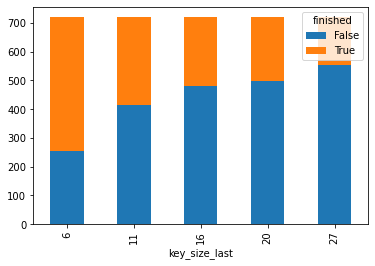

In [32]:
progress.pivot_table(
    index="key_size_last", columns="finished", values="seed_count", aggfunc="count"
).plot(kind="bar", stacked="true")

<AxesSubplot:xlabel='key_size_last'>

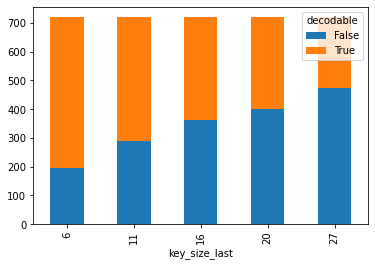

In [34]:
progress.pivot_table(
    index="key_size_last", columns="decodable", values="seed_count", aggfunc="count"
).plot(kind="bar", stacked="true")

<AxesSubplot:xlabel='population_size_last'>

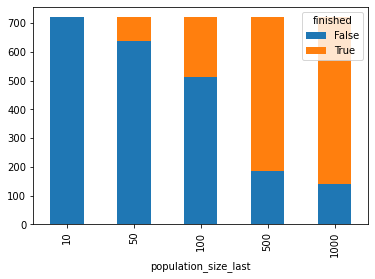

In [33]:
progress.pivot_table(
    index="population_size_last", columns="finished", values="seed_count", aggfunc="count"
).plot(kind="bar", stacked="true")

<AxesSubplot:xlabel='population_size_last'>

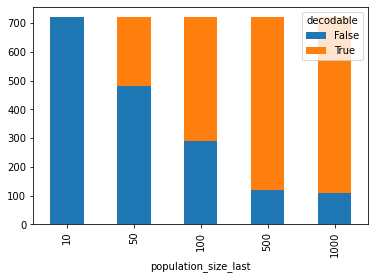

In [35]:
progress.pivot_table(
    index="population_size_last", columns="decodable", values="seed_count", aggfunc="count"
).plot(kind="bar", stacked="true")

<AxesSubplot:xlabel='mutation_threshold_last'>

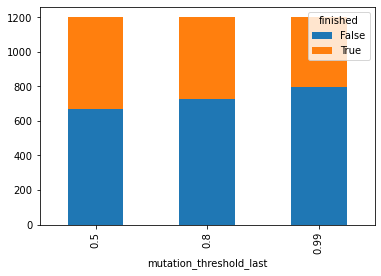

In [11]:
progress.pivot_table(
    index="mutation_threshold_last", columns="finished", values="seed_count", aggfunc="count"
).plot(kind="bar", stacked="true")

<AxesSubplot:xlabel='mutation_threshold_last'>

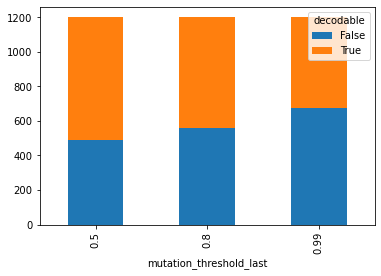

In [36]:
progress.pivot_table(
    index="mutation_threshold_last", columns="decodable", values="seed_count", aggfunc="count"
).plot(kind="bar", stacked="true")

<AxesSubplot:xlabel='symbol_progress', ylabel='score_progress'>

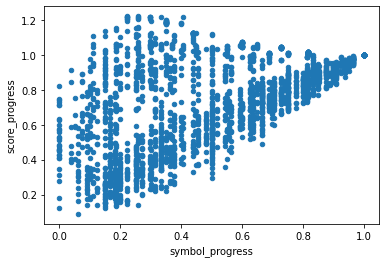

In [12]:
progress.plot.scatter(x="symbol_progress", y="score_progress")

<AxesSubplot:title={'center':'elapsed_mean'}, xlabel='key_size_last'>

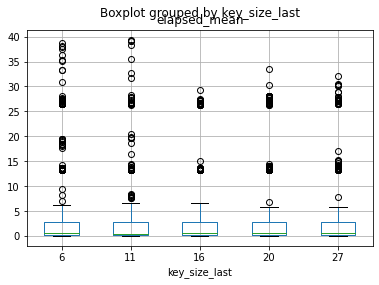

In [37]:
progress.boxplot(by="key_size_last", column="elapsed_mean")

<AxesSubplot:title={'center':'elapsed_mean'}, xlabel='key_size_last'>

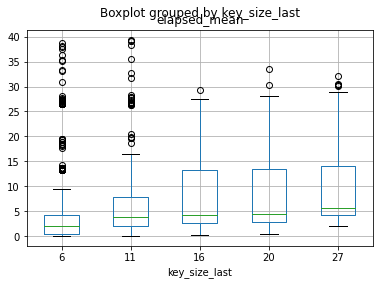

In [13]:
progress.query("finished").boxplot(by="key_size_last", column="elapsed_mean")

<AxesSubplot:title={'center':'elapsed_sum'}, xlabel='key_size_last'>

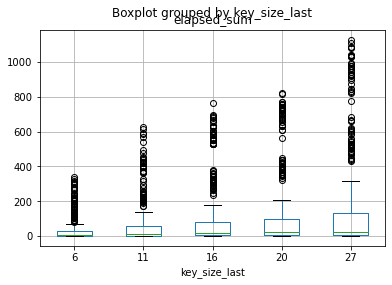

In [38]:
progress.boxplot(by="key_size_last", column="elapsed_sum")

<AxesSubplot:title={'center':'elapsed_sum'}, xlabel='key_size_last'>

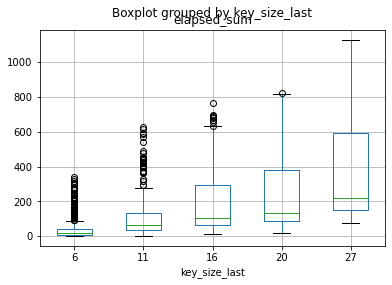

In [14]:
progress.query("finished").boxplot(by="key_size_last", column="elapsed_sum")

<AxesSubplot:title={'center':'seed_count'}, xlabel='key_size_last'>

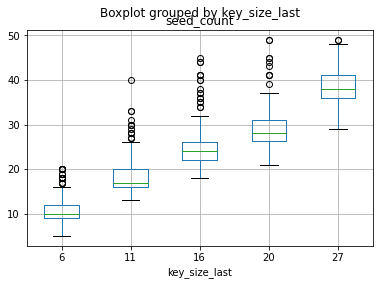

In [15]:
progress.query("finished").boxplot(by="key_size_last", column="seed_count")

<AxesSubplot:title={'center':'elapsed_mean'}, xlabel='population_size_last'>

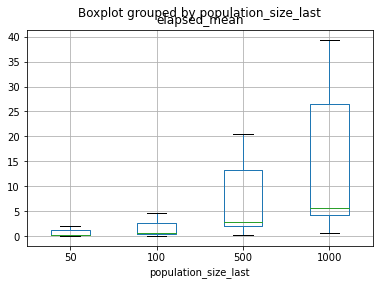

In [16]:
progress.query("finished").boxplot(by="population_size_last", column="elapsed_mean")

<AxesSubplot:title={'center':'elapsed_sum'}, xlabel='population_size_last'>

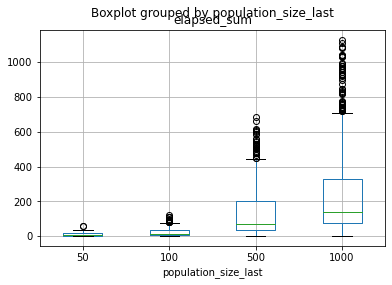

In [17]:
progress.query("finished").boxplot(by="population_size_last", column="elapsed_sum")

<AxesSubplot:title={'center':'seed_count'}, xlabel='population_size_last'>

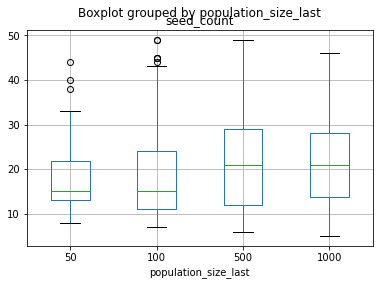

In [18]:
progress.query("finished").boxplot(by="population_size_last", column="seed_count")

<AxesSubplot:title={'center':'seed_count'}, xlabel='population_size_last'>

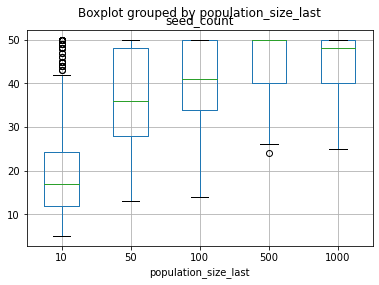

In [19]:
progress.query("~finished").boxplot(by="population_size_last", column="seed_count")

<AxesSubplot:title={'center':'seed_count'}, xlabel='population_size_last'>

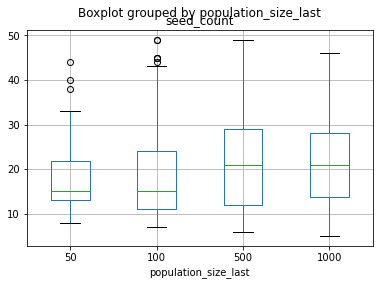

In [20]:
progress.query("finished").boxplot(by="population_size_last", column="seed_count")

<AxesSubplot:title={'center':'elapsed_mean'}, xlabel='mutation_threshold_last'>

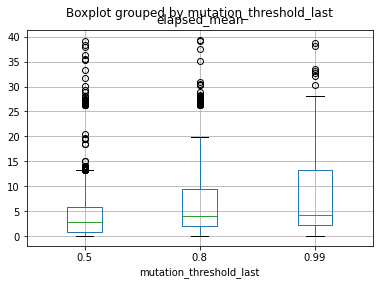

In [21]:
progress.query("finished").boxplot(by="mutation_threshold_last", column="elapsed_mean")

<AxesSubplot:title={'center':'elapsed_sum'}, xlabel='[mutation_threshold_last, finished]'>

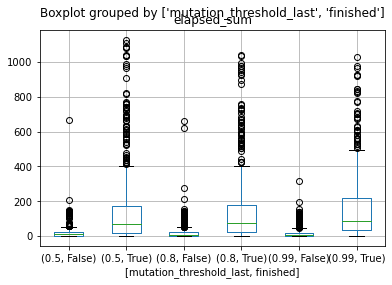

In [22]:
progress.boxplot(by=["mutation_threshold_last", "finished"], column="elapsed_sum")

<AxesSubplot:title={'center':'seed_count'}, xlabel='[mutation_threshold_last, finished]'>

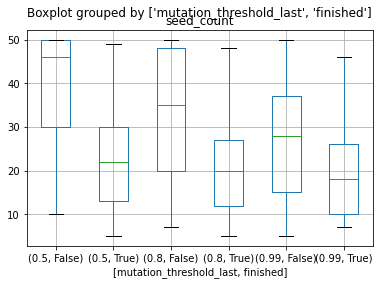

In [23]:
progress.boxplot(by=["mutation_threshold_last", "finished"], column="seed_count")

In [24]:
data.groupby("path")["elapsed"]

In [25]:
data.dtypes

Unnamed: 0.1            int64
generation              int64
generation_count        int64
seed                    int64
mutation_threshold    float64
key_size                int64
population_size         int64
global_min            float64
global_max            float64
selection_min         float64
selection_max         float64
best_individual        object
elapsed               float64
hamming_distance        int64
weights                object
target                float64
original_key           object
text_length             int64
path                   object
score                 float64
progress              float64
dtype: object

In [26]:
data.groupby("weights").count()

,Unnamed: 0.1,generation,generation_count,seed,mutation_threshold,key_size,population_size,global_min,global_max,selection_min,selection_max,best_individual,elapsed,hamming_distance,target,original_key,text_length,path,score,progress
weights,,,,,,,,,,,,,,,,,,,,
"[0, 0, 1]",25049,25049,25049,25049,25049,25049,25049,25049,25049,25049,25049,25049,25049,25049,25049,25049,25049,25049,25049,25049
"[0, 1, 0]",25595,25595,25595,25595,25595,25595,25595,25595,25595,25595,25595,25595,25595,25595,25595,25595,25595,25595,25595,25595
"[0.6, 0.3, 0.1]",25129,25129,25129,25129,25129,25129,25129,25129,25129,25129,25129,25129,25129,25129,25129,25129,25129,25129,25129,25129
"[1, 0, 0]",26288,26288,26288,26288,26288,26288,26288,26288,26288,26288,26288,26288,26288,26288,26288,26288,26288,26288,26288,26288


<AxesSubplot:xlabel='weights_last'>

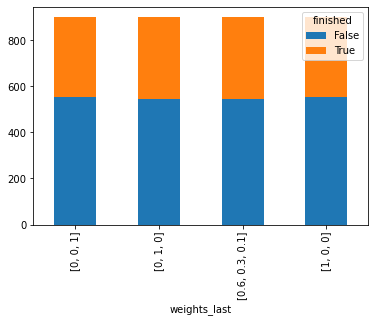

In [27]:
progress.groupby(["weights_last", "finished"])["seed_count"].count().unstack().plot(kind="bar", stacked=True)